In [15]:
# Helpful byte and bit processing
# We typically read files to encode in binary format as a byte sequence and below is some of
# the many ways you can manipulate the byte values and convert between bytes, bits, lists, etc.

# Here I'm limiting the example byte sequence to one 32bits block. In reality you will
# break your original byte sequence to as many such 64bits blocks as needed and process
# them one by one
byteseq = b'\x12\xfa\xaa\x0f'

# convert to list of integers
intlist = [int(b) for b in byteseq]
print("intlist: ",intlist)

# convert the integers list to list of 8 bits
bitslist1 = [bin(i)[2:].zfill(8) for i in intlist]
print("bitslist1: ",bitslist1)
# or directly from the bytes
bitslist2 = [bin(int(b))[2:].zfill(8) for b in byteseq]
print("bitslist2: ",bitslist2)

# convert to one big binary string
allbits = ''.join(bitslist2)
print("allbits: ",allbits)

# Note: we can also convert the string of bits into a list of bits
# For cases where we need to insert some bits into a bit sequence it's
# easier to work with lists in python. This is not the most efficient
# implementation for real cipher implementations in terms of execution
# speed but is more clear for our educational purposes
allbitslist = [b for b in allbits]
print("allbitslist: ",allbitslist)

# for now, I'll use the zfill function for strings to add enough '0's to the beginning of
# allbits string to make its length 48 (i.e., Expansion)
allbits48 = allbits.zfill(48)
print("allbits48: ",allbits48)

# break into 6 bit blocks
b6list = [allbits48[i:i+6] for i in range(0,len(allbits48), 6)]
print("b6list: ", b6list)

# isolating the middle 4 bits of a 6 bit block and convert to integer
# example: 110110 should result in 1011 which is 11 decimal
bitseq6 = '110110'
midint = int(bitseq6[1:5],base=2)  # int() function converts the string to decimal and 2 means string is a binary number
print("midint: ", midint)

# isolating first and last bits of the 6 bit string and converting to decimal
outerint = int(bitseq6[0]+bitseq6[5],base=2)
print("outerint: ",outerint)


# Given the above transformations, we can define all types of transformation utility functions
# for example a function to convert a given byte sequence to a string representation of bits
def byteseq2binstr(byteseq):
    # first convert to a list string binary representations of each byte
    bitslist2 = [bin(int(b))[2:].zfill(8) for b in byteseq]
    
    # then merge all those strings
    allbitsstr = ''.join(bitslist2)
    
    return allbitsstr
    



intlist:  [18, 250, 170, 15]
bitslist1:  ['00010010', '11111010', '10101010', '00001111']
bitslist2:  ['00010010', '11111010', '10101010', '00001111']
allbits:  00010010111110101010101000001111
allbitslist:  ['0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1']
allbits48:  000000000000000000010010111110101010101000001111
b6list:  ['000000', '000000', '000000', '010010', '111110', '101010', '101000', '001111']
midint:  11
outerint:  2


# Data Encryption Standard (DES)

## Overall Architecture

#### DES follows the Feistel architecture with an extra pair of permutation and inverse permutation at the 
#### beginning and end of the encryption, respectively. More importantly, DES defines a special round 
#### function that guarantees adequate mix of substitutions and permutations to make cryptanalysis very
#### difficult. 

 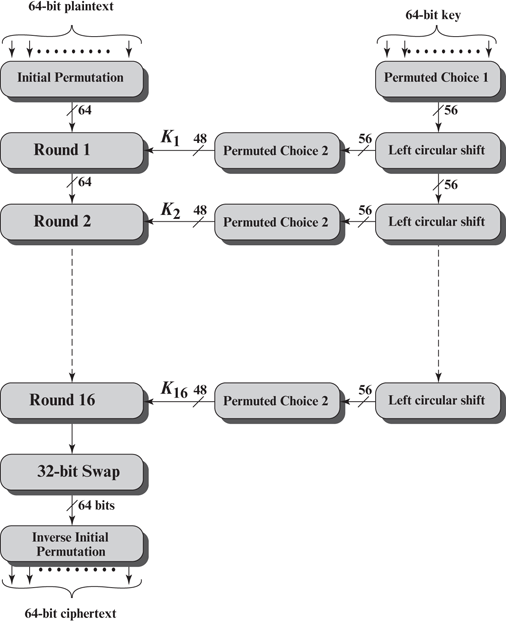
 Figure 1. Overall architecture of DES encryption
 
 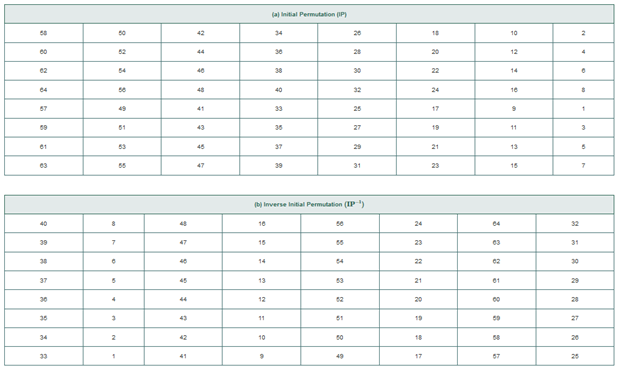
 Figure 2. Initial Permutation and inverse Initial Permutation data

### Initial Permutation and Initial Permutation Inverse

#### Follow the discussion below and write a functions that performs permutation on the bits of the given 
#### input byte sequence according to a given permutation list. This function can be used for both the Initial Permutation
#### and the Inverse Initial Permutation in DES by giving passing the proper permutation list to its second argument

#### Permutation (byteseq, permorderlist)

In [30]:
# Initial Permutation and inverse permutaion operatoins can be easily performed 
# using lists and proper indexing of the elements of the lists in Python 

# Let's define the order of the elements at the output of the Initial Permutation (IP) stage
# in the following list (we subtract the values in the book by 1 since we always
# index array elements from 0 upward) 
BookInitPermOrder = [58,50,42,34,26,18,10,2,
                   60,52,44,36,28,20,12,4,
                   62,54,46,38,30,22,14,6,
                   64,56,48,40,32,24,16,8,
                   57,49,41,33,25,17,9,1,
                   59,51,43,35,27,19,11,3,
                   61,53,45,37,29,21,13,5,
                   63,55,47,39,31,23,15,7]

InitPermOrder = [x-1 for x in BookInitPermOrder]

# Same can be done for Inverse Initial Permuation
BookInvInitPermOrder = [40, 8, 48, 16, 56, 24, 64, 32,
                        39, 7, 47, 15, 55, 23, 63, 31,
                        38, 6, 46, 14, 54, 22, 62, 30,
                        37, 5, 45, 13, 53, 21, 61, 29,
                        36, 4, 44, 12, 52, 20, 60, 28,
                        35, 3, 43, 11, 51, 19, 59, 27,
                        34, 2, 42, 10, 50, 18, 58, 26,
                        33, 1, 41,  9, 49, 17, 57, 25 ]

InvInitPermOrder = [x-1 for x in BookInvInitPermOrder]



# The permutation table basically says the first element of the output data should take the 
# value of the 32nd element of the input data or thrid element of the output data sould take the
# value of the second element of the input data. In other words, InitPerm is a function that takes
# a 64 bit byte array as input and returns another 64 but array as output

# Let's manually create an 8 byte long byte sequence (in your homework you will read the file data
# automatically as byte sequence)
inputstr = 'a string'
inputbytes = bytes(inputstr, 'utf-8')


# let's convert the input bytes block to a string representation of its bits
inputbitstr = byteseq2binstr(inputbytes)
print('inputbitstr: ',inputbitstr)

# Now we can use the InitPermData to pick which bits of this input bits string goes to which bits of 
# the permutated bits string
# We first create the permutated bits as a list since we can easily use python's list comprehensions operations
inputbitslistperm = [inputbitstr[b] for b in InitPermOrder]
inputbitstrperm = ''.join(inputbitslistperm)
print('inputbitslistperm: ',inputbitslistperm)
print('inputbitstrperm: ',inputbitstrperm)

# Now you can put the above inside this function so that it can be called to perform
# both initial and inverse initial permutations for DES
# You may need some conversion from byteseq to bitstring and reverse to use this function with your
# feistel implementation
def Permutation(bitstr, permorderlist):
    permedbitstr = ''.join([bitstr[b] for b in [x-1 for x in permorderlist]])
    return permedbitstr

print(inputbitstr)
a = Permutation(inputbitstr, BookInitPermOrder)
print(a)
print(Permutation(a, BookInvInitPermOrder))

inputbitstr:  0110000100100000011100110111010001110010011010010110111001100111
inputbitslistperm:  ['1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0']
inputbitstrperm:  1111110100011100110010001010010100000000111111110110000011010100
0110000100100000011100110111010001110010011010010110111001100111
1111110100011100110010001010010100000000111111110110000011010100
0110000100100000011100110111010001110010011010010110111001100111


## Details of a Single Round

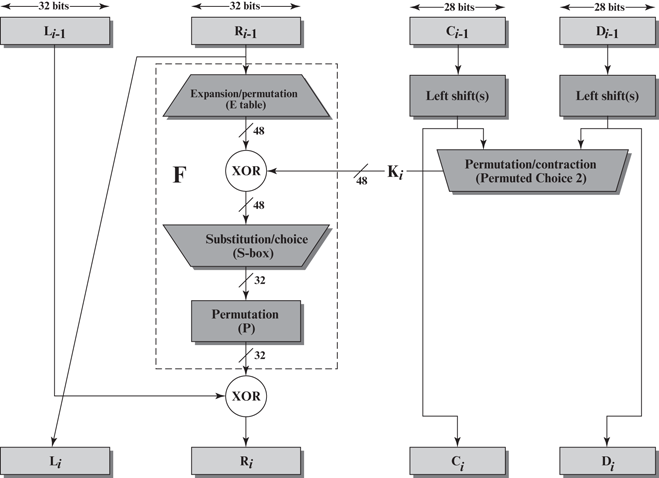
Figure 3. Details of a Single Round

##### As shown in the left side of the above diagram, we need Expansion(E), 
##### Substitution (s-box), XOR, and Permutation (P) operations for full implementation of
##### the round function in DES. for simplicity, we choose to use the bit string format for
##### representing the data since it is suitable for all of the above operations. In other words
##### we need our funciton to work on 32 bit strings such as:
##### '1111110100011100110010001010010100000000111111110110000011010100'
##### using the discussions at the beginning of this homework, you should know how to convert your byte sequences
##### into this bit string format to pass to the round operations

#### Expantion and Permutation tables of the round function

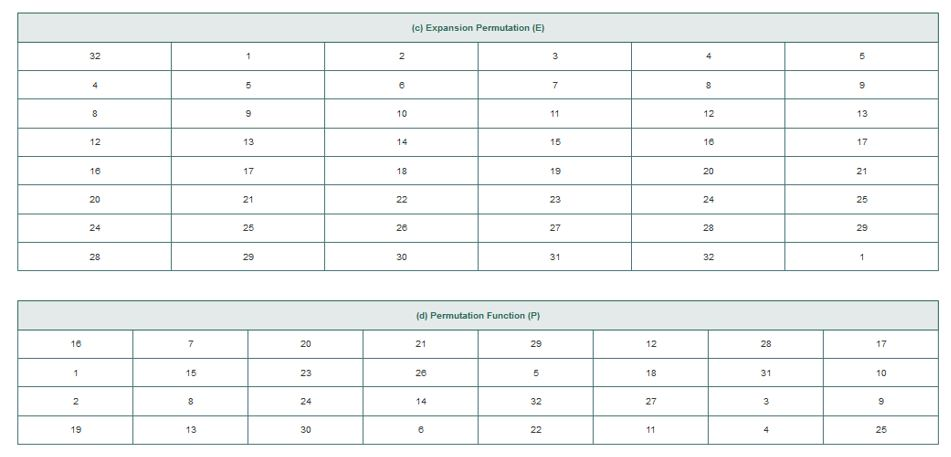


In [17]:
# EXPANSION (E)
# The E operation involves inserting additional bits inside the input 32 bits sequence
# We can start with an empty output bit string and then take proper bits from the input 
# according to the E_TABLE below and add the bits one by one to the end of the output
# string

E_TABLE = [32,1,2,3,4,5,4,5,6,7,8,9,8,9,10,11,12,13,12,13,14,15,16,17,
16,17,18,19,20,21,20,21,22,23,24,25,24,25,26,27,28,29,28,29,30,31,32,1]

def Expansion(inputbitstr32, e_table):
    # the input string is 32 bits long and the output string will be 48 bits long or
    # to be more exact, it will be as long as the e_table (which is 48 bits for DES)
    
    # create output empty string
    outputbitstr48 = ''.join([inputbitstr32[b] for b in [x-1 for x in e_table]])

    # add proper elements from the inputbitstr32 according to the e_table
    
    return outputbitstr48

# Permutation (P)
# the P operation is exactly like the permutation operation we perfomred before for initial permutation (IP)
# and the Permutation function we implemented before can be used here as well

In [18]:
a = [int(q) for q in '101']
b = [int(w) for w in '010']
c = ''.join([str(d^f) for d,f in zip([int(q) for q in '101'],[int(w) for w in '010'])])
print(c)

111


In [22]:
# XOR
# In Feistel, we implemented XOR function with byte sequences as input. Here we redefine the XOR function
# to operate on bit string inputs.

def XORbits(bitstr1,bitstr2):
    # Both bit strings should be the same length
    # output will be a string with the same length
    B1 = [int(q) for q in bitstr1]
    B2 = [int(w) for w in bitstr2]
    xor_result = ''.join([str(d^f) for d,f in zip(B1, B2)])
    
    return xor_result

# XORbits('1010', '0101')

## S-box

##### S-box operations is one the main parts of the DES standard. It breaks the 48 bits input bit string into 8 6bit blocks and subjects 
##### each of the 6bit blocks to a transformation defined by one of the 8 s-boxes defined by the standard. 
##### The middle part of the picture below shows the 6bit blocks going through the 8 s-boxes

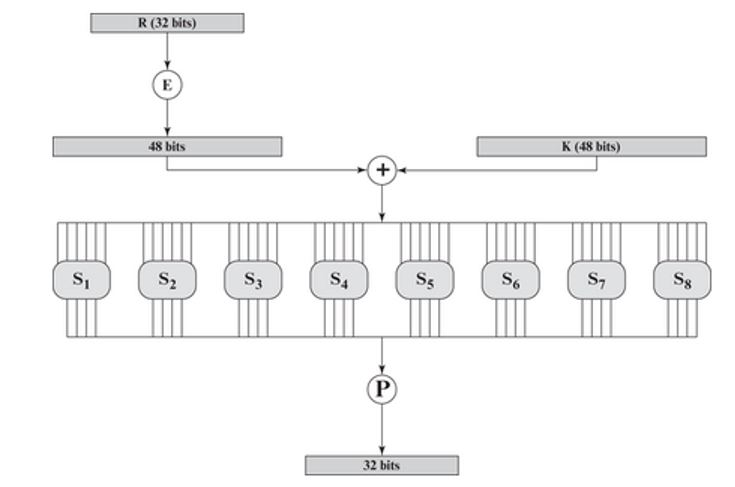
Figure 4. Round Function and S-boxes

##### Each S-box is a 4x16 table of 0-15 integers (each represented by 4 bits) and its role is to map the input 6bit block to a 
##### completely independent 4bit value to that we have 8 4bit blocks that will form a 32 bit output which is a heavily transformed
##### block and has no resemblance (statistically) to thebits of the input 48 bits. The way each 6bit block is transformed into
##### a 4bit output is by converting the 6 bits to a row index (0-3) and a column index (0-7) and pick the number that is in the
##### corresponding cell of the S-box and use its 4-bit binary representation as the output of that s-box. the rwo index is represented 
##### by bits 0 and 5 (first and last bits) of the 6bit block and the column index is respresented by the bits 1-4 of the 6bit block.
##### the 8 S-boxes are shown below:

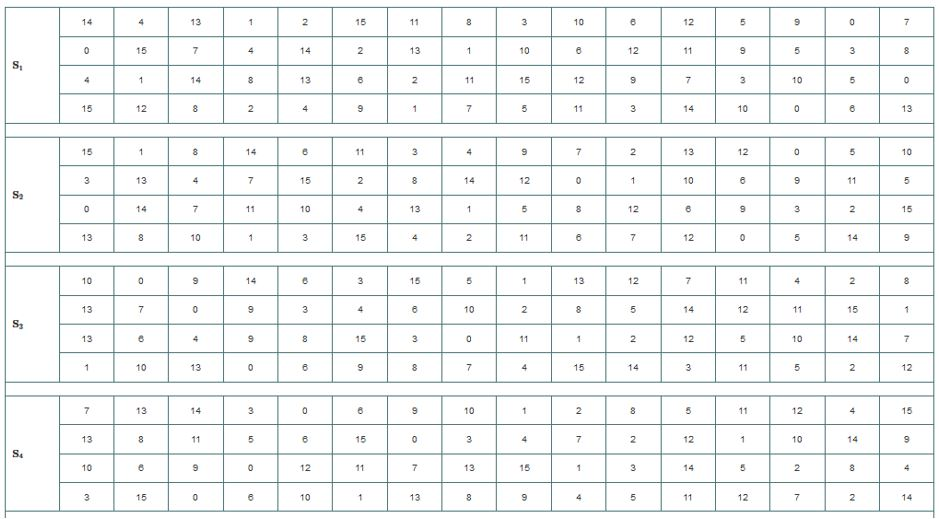
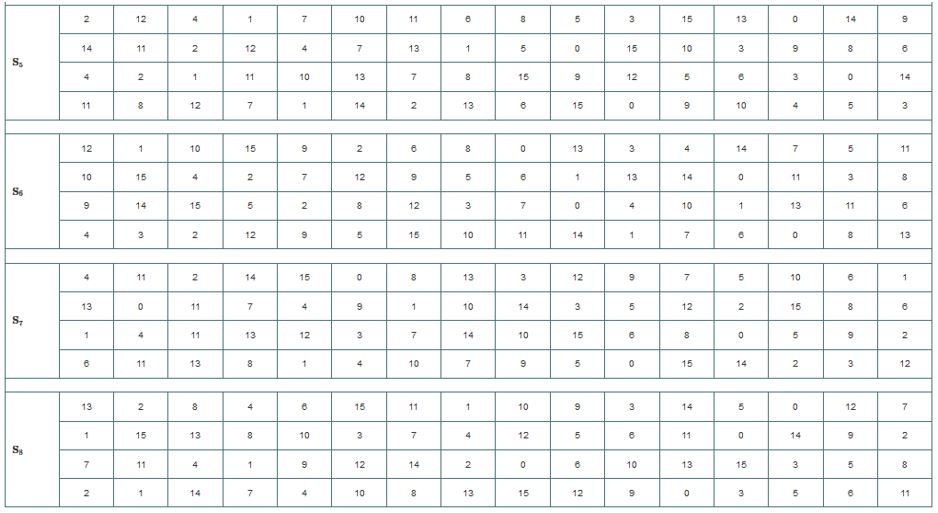
Figure 5. S-box Tables

##### for example if '100011' is applied to s-box 1, the row index will be '11' or 3 and the column index wil be '0001' or 1 so the value of 
##### cell (3,1) will be picked which is 12 or '1100'. So '100011' will be converted to '1100' by s-box 1.

In [23]:
# We previously showed how to extract the bits from 6bit blocks and find the row and column indices for
# use in the s-box operation. Each S-box can be represented as a list of lists to allow row-column access
# and we can put all s-boxes in a parent list SBOX for easy addressing. Remember that Sbox-1 is SBOX[0]
# and sbox-2 is SBOX[1] and sbox-8 is SBOX[7]

SBOX = [
# Box-1
[
[14,4,13,1,2,15,11,8,3,10,6,12,5,9,0,7],
[0,15,7,4,14,2,13,1,10,6,12,11,9,5,3,8],
[4,1,14,8,13,6,2,11,15,12,9,7,3,10,5,0],
[15,12,8,2,4,9,1,7,5,11,3,14,10,0,6,13]
],
# Box-2

[
[15,1,8,14,6,11,3,4,9,7,2,13,12,0,5,10],
[3,13,4,7,15,2,8,14,12,0,1,10,6,9,11,5],
[0,14,7,11,10,4,13,1,5,8,12,6,9,3,2,15],
[13,8,10,1,3,15,4,2,11,6,7,12,0,5,14,9]
],

# Box-3

[
[10,0,9,14,6,3,15,5,1,13,12,7,11,4,2,8],
[13,7,0,9,3,4,6,10,2,8,5,14,12,11,15,1],
[13,6,4,9,8,15,3,0,11,1,2,12,5,10,14,7],
[1,10,13,0,6,9,8,7,4,15,14,3,11,5,2,12]

],

# Box-4
[
[7,13,14,3,0,6,9,10,1,2,8,5,11,12,4,15],
[13,8,11,5,6,15,0,3,4,7,2,12,1,10,14,9],
[10,6,9,0,12,11,7,13,15,1,3,14,5,2,8,4],
[3,15,0,6,10,1,13,8,9,4,5,11,12,7,2,14]
],

# Box-5
[
[2,12,4,1,7,10,11,6,8,5,3,15,13,0,14,9],
[14,11,2,12,4,7,13,1,5,0,15,10,3,9,8,6],
[4,2,1,11,10,13,7,8,15,9,12,5,6,3,0,14],
[11,8,12,7,1,14,2,13,6,15,0,9,10,4,5,3]
],
# Box-6

[
[12,1,10,15,9,2,6,8,0,13,3,4,14,7,5,11],
[10,15,4,2,7,12,9,5,6,1,13,14,0,11,3,8],
[9,14,15,5,2,8,12,3,7,0,4,10,1,13,11,6],
[4,3,2,12,9,5,15,10,11,14,1,7,6,0,8,13]

],
# Box-7
[
[4,11,2,14,15,0,8,13,3,12,9,7,5,10,6,1],
[13,0,11,7,4,9,1,10,14,3,5,12,2,15,8,6],
[1,4,11,13,12,3,7,14,10,15,6,8,0,5,9,2],
[6,11,13,8,1,4,10,7,9,5,0,15,14,2,3,12]
],
# Box-8

[
[13,2,8,4,6,15,11,1,10,9,3,14,5,0,12,7],
[1,15,13,8,10,3,7,4,12,5,6,11,0,14,9,2],
[7,11,4,1,9,12,14,2,0,6,10,13,15,3,5,8],
[2,1,14,7,4,10,8,13,15,12,9,0,3,5,6,11]
]

]

# Let's define a table for quick conversion of sbox decimals to 4 bit binary
DECtoBIN4 = {0: '0000',
            1: '0001',
            2: '0010',
            3: '0011',
            4: '0100',
            5: '0101',
            6: '0110',
            7: '0111',
            8: '1000',
            9: '1001',
            10: '1010',
            11: '1011',
            12: '1100',
            13: '1101',
            14: '1110',
            15: '1111'}

print(DECtoBIN4[12])


1100


In [26]:
# we can now implement the sbox operations by combining the above material


def sbox_lookup(input6bitstr, sboxindex):
    # find the row index (0-3)
    # find the col index (0-7)
    row = int(input6bitstr[0]+input6bitstr[5], base=2)
    col = int(input6bitstr[1:5],base=2)
    sbox_value = SBOX[sboxindex][row][col]
    
    # Need to convert to 4 bits binary string    
    return DECtoBIN4[sbox_value]


In [29]:
#Example:
sbox_lookup('011110', 7)

'0111'

## The Round Function F()

##### Having all above function implemented and tested, the round function will be easy to implement.

In [19]:
def functionF(bitstr32, keybitstr48):
    
    # return the result
    PermBook = [16, 7, 20, 21, 29, 12, 28, 17,
             1, 15, 23, 26, 5, 18, 31, 10,
             2, 8, 24, 14, 32, 27, 3, 9,
            19, 13, 30, 6, 22, 11, 4, 25]
    e = Expansion(bitstr32, E_TABLE)
    print("Expansion: ",e)
    x = XORbits(e, keybitstr48)
    print("XOR: ",x)
    sub6list = [x[i:i+6] for i in range(0,len(x), 6)]
    print("sub6list: ", sub6list)
    s = ''.join([sbox_lookup(a, ind) for a in zip(sub6list, [0,1,2,3,4,5,6,7])])
    outbitstr32 = Permutation(s, Perm)
    return outbitstr32


## Key Generation

##### As shown in Figure 1, the input key to the system is a 64bit key. The input key initially goes through a permutation/reduction table 
##### (Permutation Choice 1 - PC1) that will shuffle and reduce the input key to 56bit key. 
##### The 56bit key then goes through a combination of circular shitfs and permutations to generate the 48bit subkeys to each round.
##### Figure 6 shows the details of each round
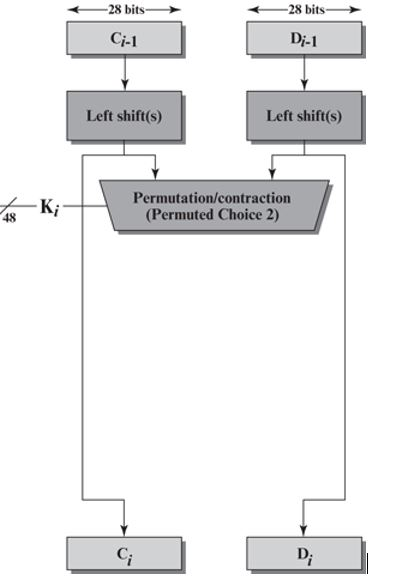
Figure 6. Key generation for each round

##### The folloing operation are needed to implement the key genration for DES:

#####     - Permutation Choice operation - PC1 and PC2
#####     - Circular Shift on half blocks

##### Details of each operation are defined by the tables below
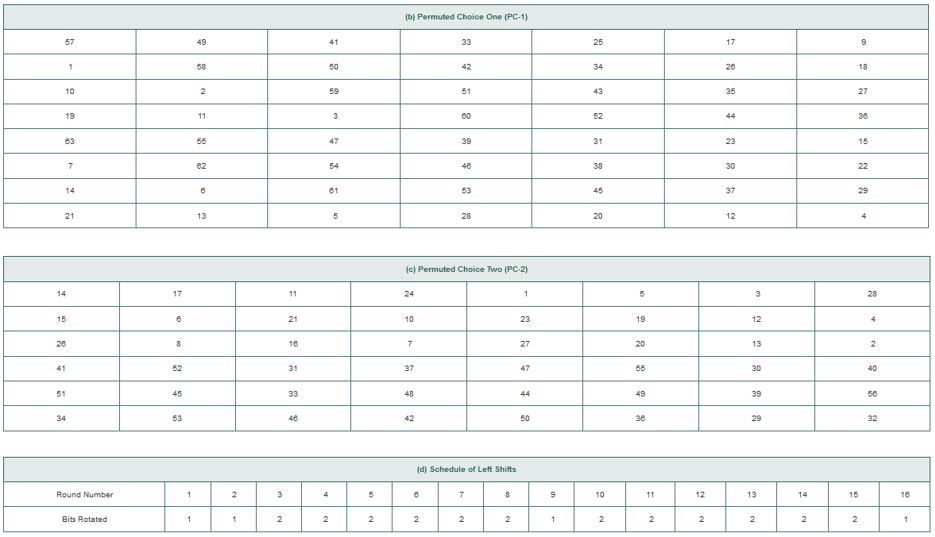
Figure 7. key generation data


## DES Encryption

In [ ]:
def des_keygen(C_inp, D_inp, roundindex):
    # Implement Figure 6
    
    return key48, C_out, D_out
 
def des_round(LE_inp32, RE_inp32, key48):
    # LEinp and REinp are the outputs of the previous round
    # k is the key for this round which usually has a different 
    # value for different rounds

    
    return LE_out32, RE_out32

# even though DES is strictly 16 rounds, we keep the number of rounds as a parameter for
# easier extension and also for better testing (setting rounds to 1).

def des_enc(inputblock, num_rounds, inputkey64):
    # This is the function that accepts one bloc of plaintext
    # and applies all rounds of the DES cipher and returns the
    # cipher text block. 
    # Inputs:
    # inputblock: byte sequence representing input block
    # num_rounds: integer representing number of rounds in the feistel 
    # key: byte sequence (8 bytes)
    # Output:
    # cipherblock: byte sequence    
    
    
    return cipherblock
    
def des_enc_test(input_fname, inputkey64, num_rounds, output_fname):
    
    # inputkey64: byte sequence (8 bytes)
    # numrounds: asked since your feistel already has it but we always use 16 for DES
    
    # First read the contents of the input file as a byte sequence
    finp = open(input_fname, 'rb')
    inpbyteseq = finp.read()
    finp.close()
    
    # Then break the inpbyteseq into blocks of 8 bytes long and 
    # put them in a list
    # Pad the last element with spaces b'\x20' until it is 8 bytes long
    # blocklist = [list of 8 byte long blocks]
    
    # Loop over al blocks and use the dec_enc to generate the cipher block
    # append all cipherblocks together to form the outut byte sequence
    # cipherbyteseq = b''.join([list of cipher blocks])
    
    # write the cipherbyteseq to output file
    fout = open(output_fname, 'wb')
    
    fout.write(cipherbyteseq)
    fout.close()
    

    


## DES Decryption

In [ ]:

def des_dec(inputblock, num_rounds, inputkey64):
    # This is the function that accepts one bloc of ciphertext
    # and applies all rounds of the DES cipher and returns the
    # plaintext text block. 
    # Inputs:
    # inputblock: byte sequence representing ciphertext block
    # num_rounds: integer representing number of rounds in the feistel 
    # key: byte sequence (8 bytes)
    # Output:
    # plainblock: byte sequence    
    
    
    return plainblock
    
def des_dec_test(input_fname, inputkey64, num_rounds, output_fname):
    
    # inputkey64: byte sequence (8 bytes)
    # numrounds: asked since your feistel already has it but we always use 16 for DES
        
    # First read the contents of the input file as a byte sequence
    finp = open(input_fname, 'rb')
    cipherbyteseq = finp.read()
    finp.close()
    
    # do the decryption rounds

    # write the plainbyteseq to output file
    fout = open(output_fname, 'wb')
    fout.write(plainbyteseq)
    fout.close()
    

    
